# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this Kerne we will try to Predict who will have Heart Disease.But our main focus will be on how to compare two models using ROC and AUC Curves.In this notebook we will be covering following topic 

1.Data import and preprocessing 

2.Feature Engineering 

3.Model Built 

4.Model Comparsion using ROC curve 

5.Conclusion 

You can refer to my other Notebooks from the link https://www.kaggle.com/biphili/notebooks

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


# 1.Data Import And Preprocessing 

### Importing Modules

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
import warnings
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### Importing Data 

In [3]:
data=pd.read_csv('../input/heart-disease-uci/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Terminology

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

### Missing Values 

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We are very lucky here there are no Null Values in the dataset.But in this data the missing values are present in the form of value ZERO. Our next task would be to find out numbers of ZEROS in each column.

### Findout Zero Values in DataSet

In [5]:
cols = data.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
print("# Rows in the dataset {0}".format(len(data)))
print("---------------------------------------------------")
for col in cols:
    print("# Rows in {1} with ZERO value: {0}".format(len(data.loc[data[col] ==0]),col))

# Rows in the dataset 303
---------------------------------------------------
# Rows in age with ZERO value: 0
# Rows in sex with ZERO value: 96
# Rows in cp with ZERO value: 143
# Rows in trestbps with ZERO value: 0
# Rows in chol with ZERO value: 0
# Rows in fbs with ZERO value: 258
# Rows in restecg with ZERO value: 147
# Rows in thalach with ZERO value: 0
# Rows in exang with ZERO value: 204
# Rows in oldpeak with ZERO value: 99
# Rows in slope with ZERO value: 21
# Rows in ca with ZERO value: 175
# Rows in thal with ZERO value: 2
# Rows in target with ZERO value: 138


The columns which have categorical values can have ZERO values.But columns like cp,trestbps,chol,fbs,exang,oldpean and Slope should not have value ZERO.The presence of ZERO in this columns indicate the presence of null values.

### Data Types 

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

As all the columns are either integer or float there is no need to convert categorical values numeric values.

# 2.Feature Engineering 

### Correlation Plot

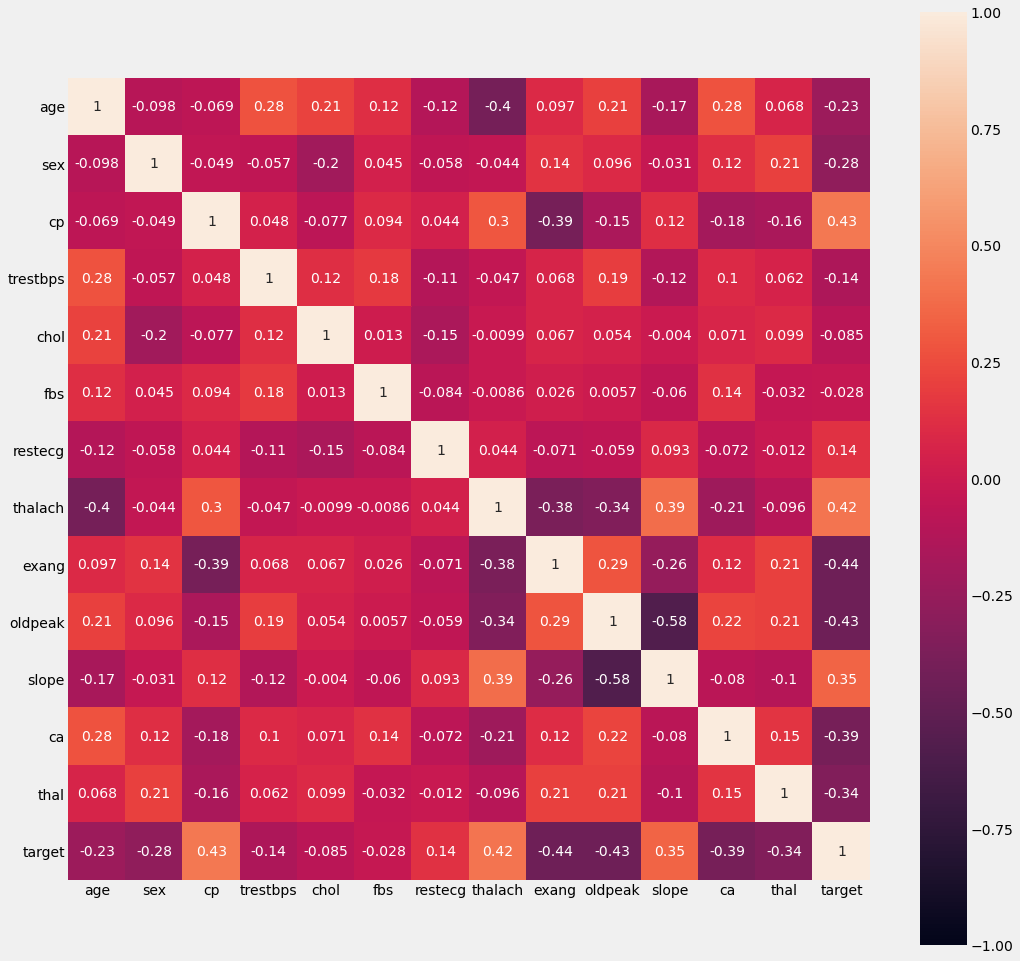

In [8]:
corrmat = data.corr()
fig = plt.figure(figsize = (16,16))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

We can see that there is not much correlation between the features in the dataset.If corelation was high we can face issue of multicollinearity.In that case we would need to use feature engineering to avoid multi colinearity.

### Dropping Unwanted Columns 

In [9]:
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
final_cols = cols
final_cols = list(final_cols)
final_cols.remove('ca')
final_cols.remove('cp')
final_cols.remove('exang')
final_cols.remove('fbs')
final_cols.remove('restecg')
final_cols.remove('sex')
final_cols.remove('slope')
final_cols.remove('target')
final_cols.remove('thal')
final_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We have dropped the columns with categorical columns.This is because when we do feature engineering we will be repacing the numerical column Zero values with the mean values.This is not needed for the columns with categorical variables.

### Creating Feature of Matrix

In [11]:
X = data.drop('target',axis=1) #predictor feature columns
y = data.target
y.value_counts()

1    165
0    138
Name: target, dtype: int64

We can see that the dataset is unbalanced.First we will balance the dataset.Balancing data set is a good approach to improve the accuracy of the machine learning model.

### Balancing Dataset

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(X,y)
pd.Series(Y_res_OS).value_counts()

0    165
1    165
Name: target, dtype: int64

### Converting Numpy Arrays into Dataframe

In [13]:
X_res_OS = pd.DataFrame(X_res_OS,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
Y_res_OS = pd.DataFrame(Y_res_OS,columns=['target'])

### Test Train Split 

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_res_OS,Y_res_OS,test_size = 0.1,random_state=10)
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test labels :',len(y_test))

Training Set : 297
Test Set : 33
Training labels : 297
Test labels : 33


The number of rows of data is very low in the dataset.This may not be sufficient to build a good model.Let us see how our model works out.

### Replacing all the ZEROS with Mean of the Column

In [15]:
final_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [16]:
from sklearn.impute import SimpleImputer 
fill = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])

# 3.Machine Learning Model Built

### Importing Modules

In [17]:
from sklearn.datasets import make_classification
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Random Forest 

In [18]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

### Naive Bayes

In [19]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Predicting Probabilities 

In [20]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

We have kept Probabilities for the Positive Outcome is Kept.

In [21]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

# 4.Model Comparsion with ROC Curve 

### What is ROC Curve?

ROC curve is a plot of False Positive Rate with the True Positive Rate 

$TPR(Sensitivity) = \frac{TP}{TP + FN}$

$FPR (1 - Specificity) = \frac{FP}{TN + FP}$        

### Computing AUROC and ROC curve values

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

### Printing AUC Scores 

In [24]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.823
Naive Bayes: AUROC = 0.812


### Calculate ROC curve

In [25]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

### Plotting ROC Curve 

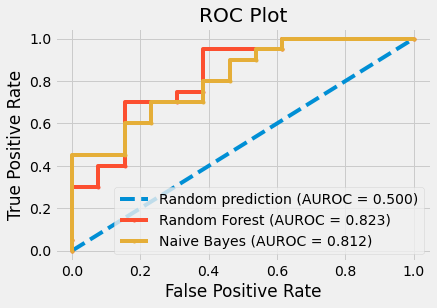

In [26]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

We ca see that the Random Forest Model Has Shightly Higher Value of AUC.So we can ay Random Fores Model Would perform better than the Naive Bayes Model for this particular Data Set.

# 5.Conclusion 

1.We have imported and preprocessed the data set.We have handled the missing values which were in the form of Zeros.

2.We have dropped some of the features as they wont have much influence on our model prediction.

3.As the dataset was unbalanced we balanced the dataset by doing oversampling.This helps to improve the model accuracy.
mode
4.We have done the Heart Disease prediction using Random Forest and Naive Bayes algorithm.

5.We plotted a ROC curve for our models and used the AUC value to arrive at he best model 

